Apply machine learning techniques to the famous Iris dataset for classification tasks. This dataset consists of 150 instances, where each instance represents a flower with features such as sepal length, sepal width, petal length, and petal width. The task is to classify these flowers into one of three species: Setosa, Versicolor, or Virginica.

We solve this classification problem by implementing two machine learning models:

- Decision Tree Classifier: A model that uses a tree-like structure to make decisions based on splitting data at each node.

- Random Forest Classifier: An ensemble method that combines multiple decision trees to improve accuracy and robustness.

Both models are evaluated in terms of their accuracy, confusion matrix, and classification report. We also visualize the decision tree structure and the importance of different features used by the Random Forest model.

In [16]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

## Loading and Exploring the Iris Dataset:

- load_iris() loads the Iris dataset from sklearn.

- X stores the feature values (e.g., sepal and petal dimensions).

- y stores the target labels (species of the flower).

- We print basic information to understand the dataset.

In [17]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
# Display basic information
print(f"Features: {iris.feature_names}")
print(f"Classes: {iris.target_names}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)


## Splitting the Data:

- We split the dataset into train (70%) and test (30%) sets.

- train_test_split helps ensure that we can train the model on one part of the data and test its performance on unseen data.

In [19]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier:

- We create a DecisionTreeClassifier object and train it on the training data.

- fit() trains the model, and predict() generates predictions on the test data.

In [20]:
# Build a Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Predict using the decision tree
y_pred_tree = dtree.predict(X_test)

## Evaluating the Decision Tree:

- accuracy_score calculates the accuracy of the Decision Tree on the test data.

- confusion_matrix shows the classification results (True vs Predicted).

- classification_report provides precision, recall, F1-score, and support for each class.

- We visualize the decision tree with plot_tree() to understand how the tree splits the data.

In [22]:
# Evaluate the Decision Tree
print("\n--- Decision Tree Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))


--- Decision Tree Results ---
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



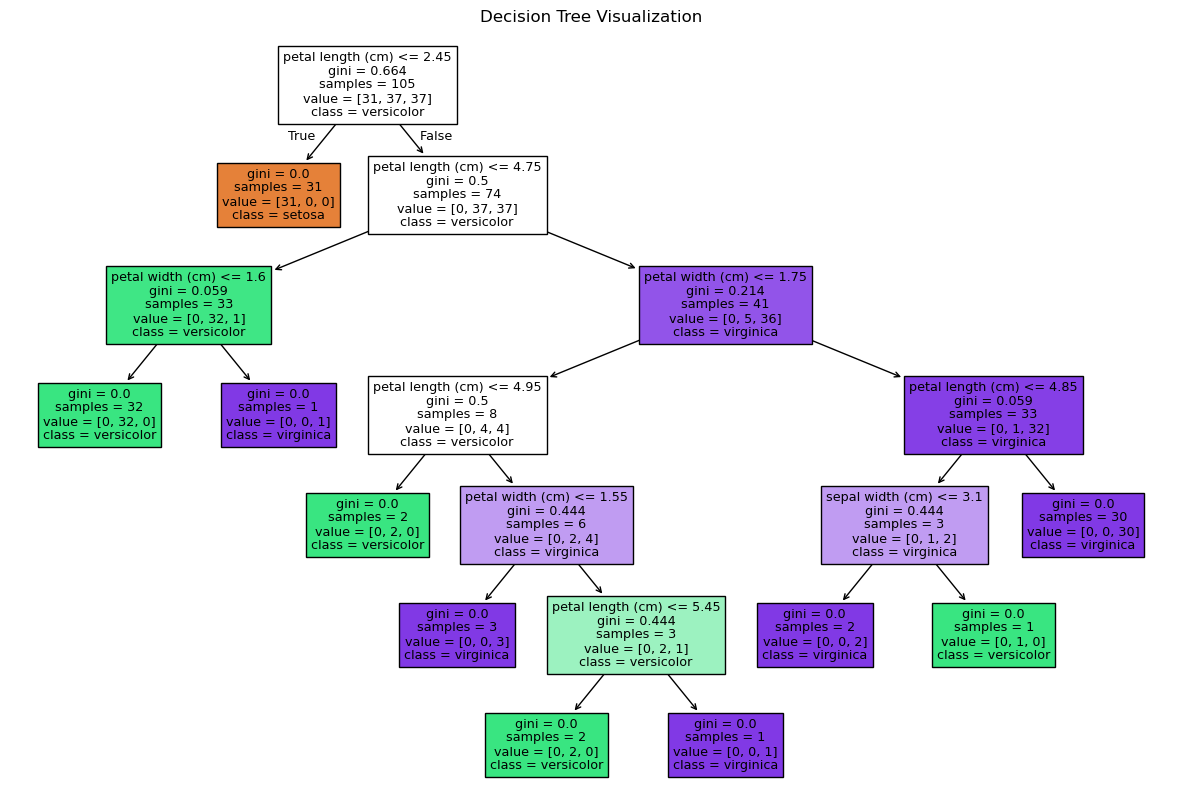

In [23]:
# Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Visualization')
plt.show()

## Random Forest Classifier (Ensemble Method):

- A RandomForestClassifier is an ensemble method that creates multiple decision trees. By combining multiple trees, it provides more stable and accurate predictions.

- We train the Random Forest model and make predictions.

In [24]:
# Build a Random Forest (Ensemble Method)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predict using the random forest
y_pred_rf = rf_model.predict(X_test)

## Evaluating the Random Forest:

- Similar to the Decision Tree, we evaluate the Random Forest model by printing the accuracy, confusion matrix, and classification report.

In [26]:
# Evaluate the Random Forest
print("\n--- Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))


--- Random Forest Results ---
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Feature Importance in Random Forest:

- We extract and visualize the feature importance from the Random Forest model. This shows which features (e.g., sepal length) contributed the most to the model's predictions.

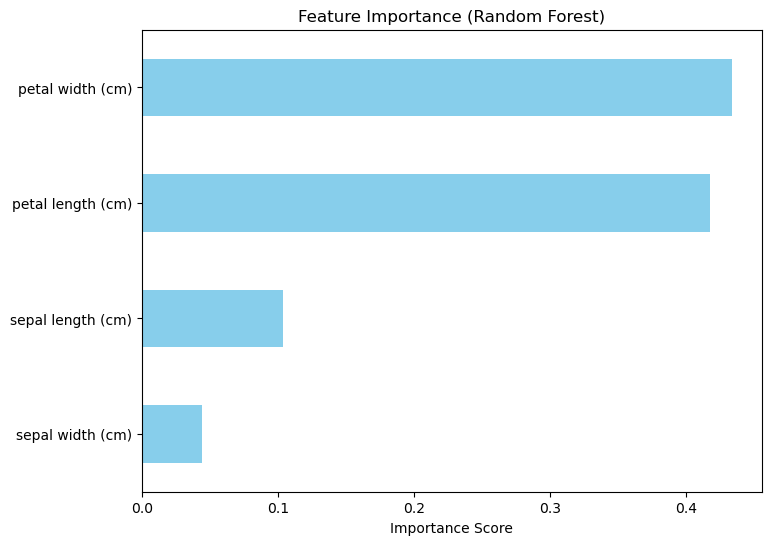

In [27]:
# Feature Importance Visualization for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=iris.feature_names)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

## Model Comparison:

- We compare the accuracy of both models (Decision Tree and Random Forest) using a barplot.

- This helps visualize the performance of both models in a single graph.

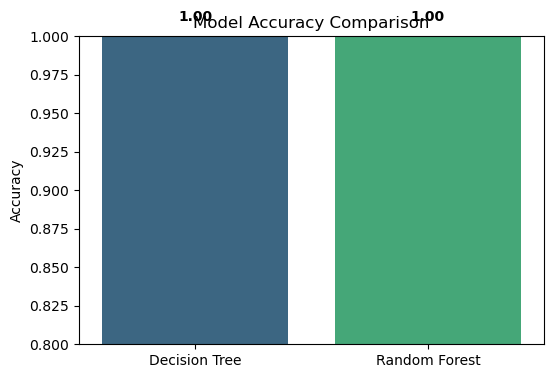

In [28]:
# Compare Accuracy
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis', hue=models, dodge=False, legend=False)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.8, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()